In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
X_train = np.linspace(-1, 1, 20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
X_test = np.linspace(-1, 1, 20)

In [5]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

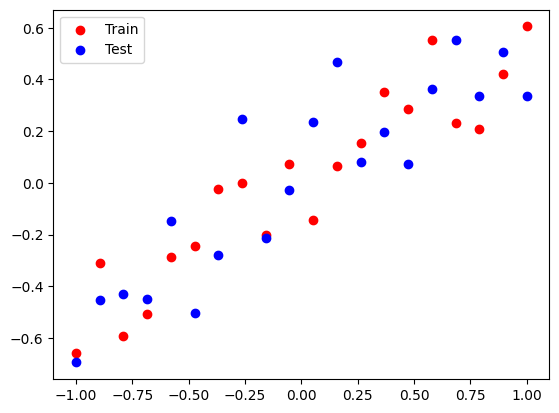

In [6]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

In [7]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=False)

C:\Users\princ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0029740375466644764, Test: 0.04502197727560997


In [9]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


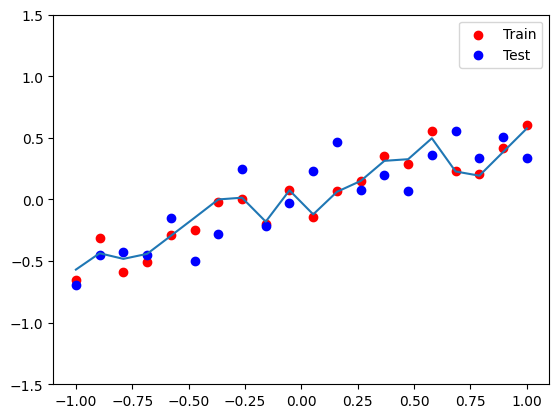

In [10]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

Dropout model

In [22]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1580 - mse: 0.1580 - val_loss: 0.0420 - val_mse: 0.0420
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0389 - val_mse: 0.0389
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0390 - mse: 0.0390 - val_loss: 0.0442 - val_mse: 0.0442
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0316 - mse: 0.0316 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0402 - val_mse: 0.0402
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0425 - val_mse: 0.0425
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0336 - mse: 0.

In [19]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.014052530750632286, Test: 0.03719516471028328


In [20]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


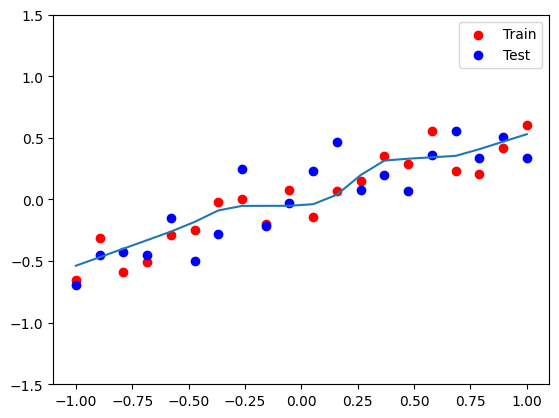

In [21]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

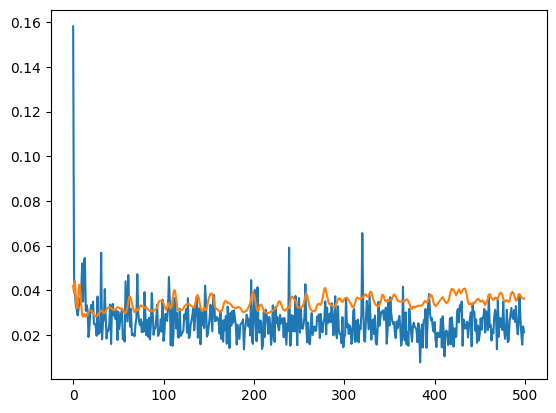

: 

In [23]:
plt.plot(drop_out_history.history['loss'])
plt.plot(drop_out_history.history['val_loss'])